# Multiple Layer GRU

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

%tensorflow_version 2.x
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

TensorFlow 2.x selected.
2.1.0


In [0]:
# If the tf.__version__ is 1.x, please run this cell
# !pip install tensorflow==2.0.0-beta0

In [3]:
import tensorflow_datasets as tfds
import tensorflow as tf
print(tf.__version__)

2.1.0


In [4]:
# Get the data
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIREAOB/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIREAOB/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteIREAOB/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
tokenizer = info.features['text'].encoder

In [6]:
BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE)
train_dataset = train_dataset.padded_batch(BATCH_SIZE, train_dataset.output_shapes)
test_dataset = test_dataset.padded_batch(BATCH_SIZE, test_dataset.output_shapes)

Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


Instructions for updating:
Use `tf.compat.v1.data.get_output_shapes(dataset)`.


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(tokenizer.vocab_size, 64),
    tf.keras.layers.Conv1D(128, 5, activation='relu'),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 64)          523840    
_________________________________________________________________
conv1d (Conv1D)              (None, None, 128)         41088     
_________________________________________________________________
global_average_pooling1d (Gl (None, 128)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                8256      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 573,249
Trainable params: 573,249
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [10]:
NUM_EPOCHS = 10
history = model.fit(train_dataset, epochs=NUM_EPOCHS, validation_data=test_dataset)

Epoch 1/10
391/391 [==============================] - 45s 116ms/step - loss: 0.4543 - accuracy: 0.7777 - val_loss: 0.3116 - val_accuracy: 0.8728
Epoch 2/10
391/391 [==============================] - 21s 54ms/step - loss: 0.2224 - accuracy: 0.9162 - val_loss: 0.2937 - val_accuracy: 0.8795
Epoch 3/10
391/391 [==============================] - 19s 49ms/step - loss: 0.1700 - accuracy: 0.9372 - val_loss: 0.3205 - val_accuracy: 0.8743
Epoch 4/10
391/391 [==============================] - 18s 46ms/step - loss: 0.1354 - accuracy: 0.9530 - val_loss: 0.3682 - val_accuracy: 0.8673
Epoch 5/10
391/391 [==============================] - 17s 44ms/step - loss: 0.1106 - accuracy: 0.9622 - val_loss: 0.4394 - val_accuracy: 0.8629
Epoch 6/10
391/391 [==============================] - 18s 45ms/step - loss: 0.0885 - accuracy: 0.9710 - val_loss: 0.4847 - val_accuracy: 0.8596
Epoch 7/10
391/391 [==============================] - 17s 44ms/step - loss: 0.0770 - accuracy: 0.9754 - val_loss: 0.5829 - val_accuracy

In [0]:
import matplotlib.pyplot as plt


def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

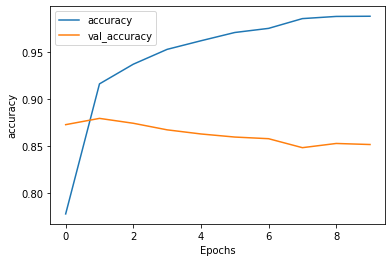

In [12]:
plot_graphs(history, 'accuracy')

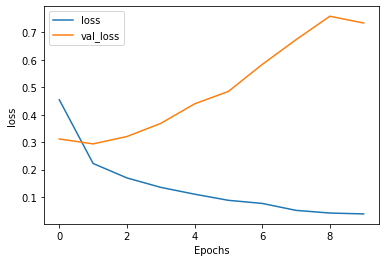

In [13]:
plot_graphs(history, 'loss')